# What is the purpose of this notebook tutorial?
We will be using a **weighted matrix** *representing the proportion of a given "token" that each node is to give to its neighbors* and assuming that the network can reach a **steady state solution** where *the given token distribution in the network no longer changes*. 

In theory, repeatedly multiplying a **distribution vector**, *the initial distribution of the tokens,* by a **transition matrix**, *the weighted adjacency or directed edge matrix,* often results in the distribution vector reaching a **steady state**. 

Supposedly, the eigenvector of the weighted matrix associated with the eigenvalue of one supposedly represents the steady state distribution of the network if given the opportunity to run (or *distribute the token*) for infinite time. Let's find out if that's true.

### Assumptions
The steady state eigenvector often implies uniqueness, especially if the network is strongly connected (all nodes can reach any other node by paths in the network), stochastic (all column or row weights sum to 1), and aperiodic (the network is not cyclical). Why is this?

## Network Example
We will be using the simple four-node directed graph to test this theory.

Initial Token Distribution Across Nodes
 node A:  p = 1.000
 node B:  p = 0.000
 node C:  p = 0.000
 node D:  p = 0.000


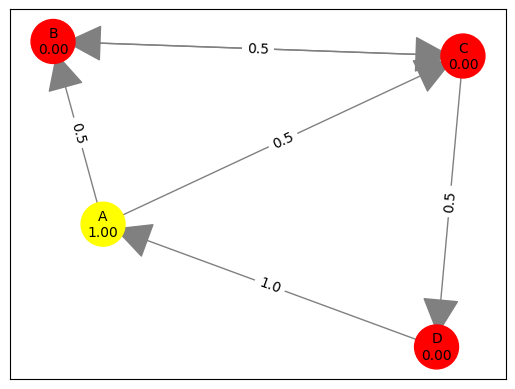

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
import numpy as np

weights = np.array([[0,1/2,1/2,0],
                   [0,0,1,0],
                   [0,1/2,0,1/2],
                   [1,0,0,0]])

G = nx.from_numpy_array(weights, create_using=nx.DiGraph)

names = {0: "A", 1: "B", 2: "C", 3: "D"}
G = nx.relabel_nodes(G, names)

node_order = ['A', 'B', 'C', 'D']
initial_token_dist = np.array([1,0,0,0])

prob_dict = {node_order[i]: initial_token_dist[i] for i in range(len(node_order))}
print("Initial Token Distribution Across Nodes")
for node, p in prob_dict.items():
    print(f" node {node}:  p = {p:.3f}")

# set that as a node‐attribute
nx.set_node_attributes(G, prob_dict, name="token_prob")

# Position nodes
pos = nx.spring_layout(G, seed=42)
probs = [G.nodes[n]["token_prob"] for n in G.nodes]
# sizes = [p * 2000 for p in probs]

nodes = nx.draw_networkx_nodes(G, pos,
                            node_color=probs,
                            cmap=cm['autumn'],
                            node_size=1000)
# nx.draw_networkx_labels(G, pos, font_size=12)
nx.draw_networkx_edges(G, pos, arrows=True, arrowsize=60,edge_color='gray')

edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

labels = {n: f"{n}\n{G.nodes[n]['token_prob']:.2f}" for n in G.nodes}

# Draw labels at node positions with these custom labels
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)

plt.show()

The following code snippet will now show you how distribution occurs by multiplying the initial distribution vector by the weighted adjacency matrix.

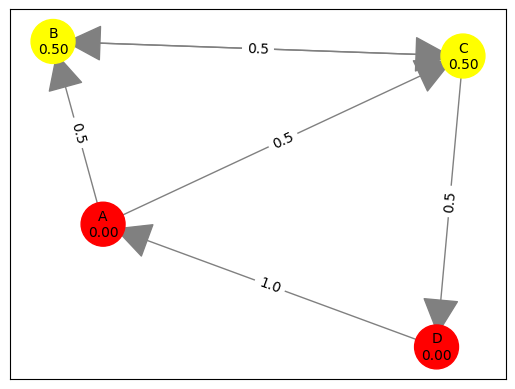

Token Distribution After 1 Round
 node A:  p = 0.000
 node B:  p = 0.500
 node C:  p = 0.500
 node D:  p = 0.000


In [3]:
# This represents the adjacency matrix (directed edge weights) for a network with four nodes.
weights = np.array([[0,1/2,1/2,0],
                   [0,0,1,0],
                   [0,1/2,0,1/2],
                   [1,0,0,0]])
# Each edge weight represents the proportion of the token that the respective node has that 
# will be shared with its neighbors. 
# (ie. 1/2 of the token that node 0 has will be shared with node 1 and half will be shared with node 2 in each iteration)

# Now we will initialize the token distribution across the nodes (creating the DISTRIBUTION VECTOR).
# In this case, node A will start with one token and the others will start with 0.
initial_token_distribution = np.array([1,0,0,0])

# Matrix multiply the token distribution vector by the weighted adjacency matrix.
token_distribution = initial_token_distribution @ weights

# This will give you the token distribution vector after the first round!

plt.ion()
fig, ax = plt.subplots()

prob_dict = {node_order[i]: token_distribution[i] for i in range(len(node_order))}

nx.set_node_attributes(G, prob_dict, name="token_prob")
ax.cla()

pos = nx.spring_layout(G, seed=42)
probs = [G.nodes[n]["token_prob"] for n in G.nodes]

nodes = nx.draw_networkx_nodes(G, pos,
                            node_color=probs,
                            cmap=cm['autumn'],
                            node_size=1000)
nx.draw_networkx_edges(G, pos, arrows=True, arrowsize=60,edge_color='gray')

edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

labels = {n: f"{n}\n{G.nodes[n]['token_prob']:.2f}" for n in G.nodes}

nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)

plt.ioff()
plt.show()

print("Token Distribution After 1 Round")
for node, p in prob_dict.items():
    print(f" node {node}:  p = {p:.3f}")


Now what happens when you run this for multiple iterations? Will this matrix reach a **steady state** where the distribution does not change anymore? Let's find out.

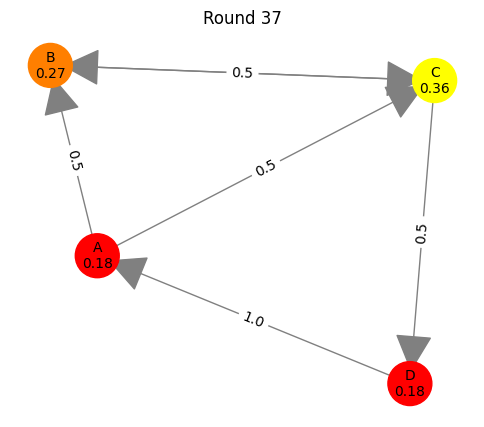

Converged in 37 iterations
Steady State Solution Found in Iteration 37
 node A:  p = 0.182
 node B:  p = 0.273
 node C:  p = 0.364
 node D:  p = 0.182


In [4]:
from IPython.display import clear_output
import time

initial_token_distribution = np.array([1,0,0,0])
token_dist = initial_token_distribution.copy()
max_iters = 100

running = True
j = 0

for i in range(max_iters):

    prob_dict = {node_order[i]: token_dist[i] for i in range(len(node_order))}
    
    nx.set_node_attributes(G, prob_dict, name="token_prob")
    clear_output(wait=True)

    pos = nx.spring_layout(G, seed=42)
    probs = [G.nodes[n]["token_prob"] for n in G.nodes]

    plt.figure(figsize=(6,5))

    nodes = nx.draw_networkx_nodes(G, pos,
                                node_color=probs,
                                cmap=cm['autumn'],
                                node_size=1000
    )
    nx.draw_networkx_edges(G, pos, arrows=True, arrowsize=60, edge_color='gray')

    edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    labels = {n: f"{n}\n{G.nodes[n]['token_prob']:.2f}" for n in G.nodes}

    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)

    plt.title(f"Round {j+1}")
    plt.axis('off')
    plt.show()

    j += 1
    time.sleep(1)

    # distribution vector is on the left side so weight matrix must be row-stochastic
    # numpy gives you right eigenvectors by default so use transpose of weighted matrix to find left eigenvectors
    new_dist = np.matmul(token_dist,weights)

    # Round the array values for speed.
    if np.allclose(new_dist, token_dist, atol=1e-5):
        print(f"Converged in {i+1} iterations")
        break

    token_dist = new_dist

print(f"Steady State Solution Found in Iteration {j}")
prob_dict = {node_order[i]: token_dist[i] for i in range(len(node_order))}
for node, p in prob_dict.items():
    print(f" node {node}:  p = {p:.3f}")

Notice how the simulation ended because the distribution vector was no longer changing. In other words, a **steady state solution** was found in only thirty iterations! Now let's see how steady states and eigenvectors relate.

# Eigenvectors, what are they?

**Eigenvector** -> a vector that keeps its SPAN (direction) after undergoing a transformation.

**Eigenvalue** -> the amount that the eigenvector is stretched/compressed along its span by a particular eigenvector.

## How do you find the eigenVALUES of a system?

Below is the definition of eigenvalues and eigenvectors:
$$A \mathbf{v} = \lambda \mathbf{v}$$
<center> or, more accurately, </center>

$$A \mathbf{v} = (\lambda I)\mathbf{v}$$ 

Where $I$ refers to the identity matrix, $\mathbf{v}$ refers to an eigenvector of matrix $A$, and $\lambda$ refers to the corresponding eigenvalue for that eigenvector.

We can solve for eigenvalues of matrices by using the characteristic equation (below) to solve for $\lambda$:
$$
\det(A - \lambda I) = 0
$$


This will give you one or more eigenvalues. 

*Note: you will never get more eigenvalues than rows in the matrix.*

## How do you find the eigenVECTORS of a system?

Given the eigenvalues you solved for previously, you now plug in each of the eigenvalues separately into this equation: 

$$
(A-\lambda I)\mathbf{v}=0
$$

Solving the system of equations for the vector $\mathbf{v}$ gives you the **eigenvector** associated with that **eigenvalue**.

Luckily, this can be done easily by using the *linalg* library of the python library *numpy*. See the example below.

In [94]:
matrix = np.array([[0.8, 0.3],[0.2, 0.7]])
eigenvalues, eigenvectors = np.linalg.eig(matrix)
    
print("Eigenvalue:", eigenvalues[0])
print("Eigenvector:", eigenvectors[0])
print("\n")
print("Eigenvalue:", eigenvalues[1])
print("Eigenvector:", eigenvectors[1])

Eigenvalue: 1.0
Eigenvector: [ 0.83205029 -0.70710678]


Eigenvalue: 0.5
Eigenvector: [0.5547002  0.70710678]


As we can see, the matrix:
$$
\begin{pmatrix}
0.8 & 0.3 \\
0.2 & 0.7 \\
\end{pmatrix}
$$
has two eigenpairs. One of which is described by the eigenvalue $\lambda$=1 and the eigenvector (0.83205029, -0.70710678).

**Something to remember about eigenvectors:** The eigenvector can be scalar-multiplied by any non-zero scalar and will still be an eigenvector associated with the same eigenvalue. This is because eigenvectors define the *direction* or *span* along which the transformation stretches or compresses space, not the amount that it is stretched. The amount that it is stretched or compressed is defined by the eigenvalue.

*NOTE: Eigenvectors and eigenvalues are not interchangeable, they are respective to each other. (ie. The eigenvector associated with the eigenvalue 0.5 is not necessarily the same as the eigenvector associated with the eigenvalue of 1.)*

> ## FREQUENTLY ASKED QUESTIONS
>
> ### *1. When do matrices **not** have eigenvalues or eigenvectors?*
>
> All **SQUARE** matrices have eigenvalues and eigenvectors. But some *real* matrices do not have *real* eigenvalues and eigenvectors.
>
> ### *2. How many eigenpairs can a square matrix have?*
>
> An $\mathbf{n}$ x $\mathbf{n}$ matrix can have $\mathbf{n}$ total eigenpairs. Sometimes, matrices may have less due to repeated eigenvalues.
>
> ### *3. What does diagonalizable refer to regarding a matrix?*
>
> If a matrix is diagonalizable, then:
> $$
> A=PDP^{-1}
> $$
> - where $D$ is a diagonal matrix with the entries along the diagonal being the eigenvalues of $A$.
> - columns of P are the corresponding eigenvectors. (ie. first diagonal entry in $D$ is the eigenvalue of the first column eigenvector in $P$)

## How does this relate to steady states?

Steady states, as defined previously, refer to a matrix (in this context) that is no longer changing states. As it turns out, an eigenvector associated with $\lambda$=1 represents the final steady state of the matrix! This is a special property of **Markov matrices**!

> **Markov matrices** (or **stochastic matrices**) have a few special properties:
> - all entries must be greater than or equal to 0
> - must form a connected loop or be strongly connected in that every node can be accessed by a path from any other node (no inaccessible sources or lone wolves)
> - all rows (or sometimes columns) must sum to 1
> - must be aperiodic (converges to a unique steady state and doesn't just continue indefinitely)

The name "Markov" refers to a mathematician that argued that "The future only depends on the present - not the past." Basically, present states determine future states, not past states. Put simply, if you had different potential "states" that you could be in and probabilities that described the potential that you would transition from one state to another, the choice that you make in each state only depends on your current state, not how you got to that state. In our case, the term "Markov matrix" refers to the weighted matrix that we are multiplying a distribution vector by at each time step. Because each time step multiplication results in a different distribution vector and only depends on the current distribution vector instead of the previous ones, it can be described as a **Markov chain**.

Another cool property of Markov matrices is that they **ALWAYS** have an eigenvalue of 1. This is because Markov matrices preserve total probability. (You can read up on this separately). Because of this property, we can use the eigenvectors associated with the eigenvalue of 1 to predict the steady state outcome/distribution of a network without iterating through each time and performing a ton of matrix multiplications!

The following code snippet will walk you through this process.

In [79]:
# Let's use numpy's function to calculate the eigenpairs of our weighted matrix.
eigenvalues, eigenvectors = np.linalg.eig(weights.T)
# TODO: I'll explain why we had to do the transpose of our weighted matrix for this function below.

# Now let's find the eigenvector associated with the eigenvalue of 1 for our matrix.
idx = np.argmin(np.abs(eigenvalues-1))

# Sometimes, the results of np.linalg.eig can be complex numbers even if the matrix and eigenvalues are real. 
# (This is due to floating-point arithmetic and numerical precision.)
# So this line takes only the real part of the eigenvector.
steady_state_analytical = np.real(eigenvectors[:, idx])

# The calculated eigenvector from numpy isn't automatically a probability distribution because eigenvectors can represent any scale and sign along its span.
# This line will normalize the eigenvector so that all elements sum to 1 and creates a valid probability distribution.
steady_state_analytical /= np.sum(steady_state_analytical)

print("""
Iterative steady state solution found in iteration 37:
node A:  p = 0.182
node B:  p = 0.273
node C:  p = 0.364
node D:  p = 0.182
 """)

print("Analytical steady state:")
for i,p in enumerate(steady_state_analytical):
    print(f"node {chr(65 + i)}:  p = {p:.3f}")


Iterative steady state solution found in iteration 37:
node A:  p = 0.182
node B:  p = 0.273
node C:  p = 0.364
node D:  p = 0.182
 
Analytical steady state:
node A:  p = 0.182
node B:  p = 0.273
node C:  p = 0.364
node D:  p = 0.182


>In our case, we found our iterative solution by performing matrix multiplication on a (1x4) distribution vector and a (4x4) weighted matrix which results in a new (1x4) >distribution vector.
>
>*This is the code we were running: new_dist = np.matmul(token_dist, weights)*
>
>This creates the function:
>
>$$
>P_{t+1} = P_{t} * W
>$$
>
>This is called *left-multiplying* the matrix $W$ since the vector is on the left side.
>*Note: This also means that the matrix $W$ must be row-stochastic, where each row sums to 1. (Like our weighted matrix is).*
>
>This means that the eigenvector that we get from our iterative approach's steady state solution is going to be a left eigenvector of $W$ with eigenvalue 1.
>
>Numpy gives us right eigenvectors by default which solve:
>$$
>W*v = \lambda*v
>$$
>
>This is called *right-multiplying* the matrix $W$ since the vector is on the right side.
>
>So to find the left eigenvector by using the numpy function, we compute the right eigenvectors of the **TRANSPOSE** of $W$.
>
>*Note: left and right eigenvectors solve different things and have different functions, they are **generally** not the same unless you are dealing with a symmetric matrix.* 

This means that if we wanted to, we could code our iterative and analytical solutions the opposite way with our weighted matrix being column-stochastic instead of row-stochastic as it is now. I have done this in the following code snippet:

In [88]:
# I will show you the left and right eigenvectors to illustrate the difference.
eigenvalues, eigenvectors = np.linalg.eig(weights.T)
idx = np.argmin(np.abs(eigenvalues-1))
print(f"Left eigenvector for our weighted matrix: {eigenvectors[:, idx]}")

# This will now return the right eigenvector associated with the eigenvalue of 1 instead of the left eigenvector.
eigenvalues, eigenvectors = np.linalg.eig(weights)
idx = np.argmin(np.abs(eigenvalues-1))
print(f"Right eigenvector for our weighted matrix: {eigenvectors[:, idx]}")

Left eigenvector for our weighted matrix: [0.34815531+0.j 0.52223297+0.j 0.69631062+0.j 0.34815531+0.j]
Right eigenvector for our weighted matrix: [-0.5+0.j -0.5+0.j -0.5+0.j -0.5+0.j]


Notice that the left and right eigenvectors are **NOT** identical, but we can still account for this by converting our weighted matrix to be column-stochastic instead of row-stochastic, which allows us to do right-multiplication (the default for numpy).

Let's calculate the steady state solutions doing a right multiplication instead!

In [93]:
column_stochastic = weights.T

eigenvalues, eigenvectors = np.linalg.eig(column_stochastic)
idx = np.argmin(np.abs(eigenvalues-1))
steady_state_analytical = np.real(eigenvectors[:, idx])
steady_state_analytical /= np.sum(steady_state_analytical)

print("Analytical steady state:")
for i,p in enumerate(steady_state_analytical):
    print(f"node {chr(65 + i)}:  p = {p:.3f}")

initial_token_distribution = np.array([1,0,0,0])
token_dist = initial_token_distribution.copy()
max_iters = 100

j = 0

for i in range(max_iters):
    # NOW I AM DEALING WITH THE TRANSPOSE OF OUR WEIGHTED MATRIX SO IT IS RIGHT-MULTIPLYING
    new_dist = np.matmul(column_stochastic, token_dist)

    # Round the array values for speed.
    if np.allclose(new_dist, token_dist, atol=1e-5):
        print("\n")
        print(f"Converged in {i+1} iterations")
        break

    token_dist = new_dist

print(f"Steady State Solution Found in Iteration {j}")
prob_dict = {node_order[i]: token_dist[i] for i in range(len(node_order))}
for node, p in prob_dict.items():
    print(f"node {node}:  p = {p:.3f}")

Analytical steady state:
node A:  p = 0.182
node B:  p = 0.273
node C:  p = 0.364
node D:  p = 0.182


Converged in 37 iterations
Steady State Solution Found in Iteration 0
node A:  p = 0.182
node B:  p = 0.273
node C:  p = 0.364
node D:  p = 0.182


As you can see, our iterative solution exactly matches our analytical steady state solution! (And our analytical steady state solution was found a lot faster than our iterative solution.) And notice that our steady state solutions come out to be the same whether we did multiplication from the left or the right, assuming we do our row and column stochasticity correctly.

> **Rule of Thumb**
>
> Row-stochastic Markov matrix: left-multiplying
> - **Analytical approach:** *use the transpose for numpy.linalg.eig function*
> - **Iterative approach:** *use the left-multiplying order for np.linalg.matmul,* $v$*$W$
>
> Column-stochastic Markov matrix: right-multiplying
> - **Analytical approach:** *use your regular Markov matrix for numpy.linalg.eig function*
> - **Iterative approach:** *use the right-multiplying order for np.linalg.matmul,* $W$*$v$

So, in sum, we have proven that the normalized eigenvector associated with the eigenvalue of 1 of a Markov matrix is representative of the steady state solution of the matrix! This saves us time computationally by eliminating the need for several of the matrix multiplications that we used for the iterative approach to find the steady state solution, thereby enabling us to save time and computational resources.

# Follow-up Questions

## How does this relate to our research into networks in poverty?

In some our models we have used weighted adjacency matrices like the one used in this notebook to describe a network. Part of our research involves seeing how the network structure affects the distribution of a resource in a community. By using the steps described in this tutorial to determine steady state solutions, if they exist, we can gain a little more insight into **_how differences in network structures affect the final distribution of resources in that network or community._**

## Does this process offer us some insight into our agent-based simulations?

Yes! Using eigenvectors and solving for a network's steady state solutions can help us analyze the structural potential of a network prior to using it to run our agent-based simulations. In other words, it can help us **_weed out poorly structured networks before using them in our more intensive and computationally-expensive ABMs_**.

## Does the initial distribution vector matter for this process?

Actually, no. Assuming that our weighted/adjacency matrix meets the requirements of Markov matrices, the steady state solution that we find represents how the distribution will *settle* if allowed to iterate until convergence. The only thing that plays a role in the final distribution (ie. the steady state solution of the matrix) is the Markov matrix itself.

## What does the term, "principal eigenvector" refer to?

The principal eigenvector simply refers to the one associated with the largest eigenvalue. In Markov matrices, this usually refers to the eigenvector associated with the eigenvalue of 1. Principal eigenvectors are cool because the values within them also show how **integral** certain nodes are to the network. High values in the principal eigenvector show us that the respective nodes are of high importance in the network and are structurally significant. *This could help us determine the "leaders" in a social network.*